<img src="Dokumentation/JupyterNotebook/Bilder/scigrid_gas_logo.png" width="300"/>

This is a Jupyter document, that will describe the SciGRID_gas project.  SciGRID_gas is a three year project funded by the German Federal Ministry for Economic Affairs and Energy (BMWi) within the funding of the 6. Energieforschungsprogramm der Bundesregierung (Funding Code: 03ET4063).

<img src="Dokumentation/JupyterNotebook/Bilder/SumLogos.jpg" width="400"/>


The intention of SciGRID_gas is to develop methods to create an automated gas network data set of the European gas transportation network.  

This Jupyter notebook is structured in the following way:

**Tabel of Content**
1.  Setup
2.  Data input/output
3.  Visualization of data
4.  Process flow overview
5.  Creation of combined network data set
6.  Attribute data QA
7.  Testing possible heuristic methods
8.  Selection of heuristics for attributes
9.  Generation of missing attribute values
10. Generation of final network

## 1 Setup

## 1.1 Setup up libraries
A requirements.txt file will be used to set up all lybraries neede for SciGRID_gas.
Selecgt one of the following:

**Unix**:

- pip install -r requirements.txt


**Windows**:

- pip install -r requirements_pip.txt
- conda install --file requirements_conta.txt

## 1.2 Directory
Just checking that we are all in the same main SciGRId_gas folder:

In [1]:
import os

print(os.getcwd())

C:\Programming\OpenSciGRID_gas


## 1.3 Testing environment
Here comes some code to just test the plotting functionality in a function supplied by the project.

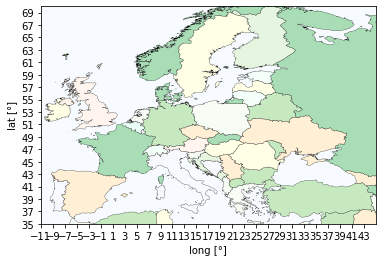

In [3]:
import Code.TestSetup as TS
TS.main()

If there is a warning (in red about fuzzywuzzy) and a map plot of Europe, than one knows, that one can execute code supplied by the SciGRID_gas project.

# 2 Data input/output
The following part describes how to generate the input data that will be used as the input data for the data merge process within the SciGRID_gas project.
There are two data sets, that will be merged:
* **InternetData**: This is a  data set collated by the SciGRID_gas project, by looking through the internet, incuding news paper clipps, press releases, fact sheets and Wikipedia.
* **GIE**: This is a data set that was generated by loaded data from the  Gas Intrastructure Europe through their API.  

Several functions have been written that will load the indevidual data and the resulting gas component data set can be saved into a CSV file.


## 2.1 Importing all required SciGRID_gas modules

In [4]:
import Code.M_Internet          as M_Internet
import Code.M_GIE               as M_GIE
import Code.M_CSV               as M_CSV
import Code.M_Visuell           as M_Visuell
import Code.M_LoadAdditional    as M_LoadAdditional
import Code.JoinNetz            as JoinNetz
import Code.M_Shape             as M_Shape

### 2.2 InternetData data

In [5]:
Netz_InterNet   = M_Internet.read()

Now we can check, that something was read in.  All data will have been loaded into the memory, and can be summarized with the method *.all().

In [6]:
Netz_InterNet.all()

--------------------------------------
Source                         InterNet
total component type count          0
--------------------------------------
BorderPoints                      117
Compressors                       237
ConnectionPoints                    0
Consumers                           0
EntryPoints                        37
InterConnectionPoints             117
LNGs                               32
Nodes                             739
PipeLines                           0
PipePoints                          0
PipeSegments                      532
Processes                           2
Productions                         0
Storages                          197
--------------------------------------
Length of PipeLines    [km]         0
Length of PipeSegments [km]     46336


Data has been read in, for the component "*BorderPoint*", "*Compressors*", "*EntryPoints*", "*InterConnectionPoints*", "*LNGs*", "*Nodes*", "*PipeSegments*" and "*Storages*", with the last column indicating the number of element per component.


In addition, ".all()" method also works on indevidual elements:

In [7]:
Netz_InterNet.LNGs[0].all()

comment: 
country_code: GR
id: Alexandroupolis
lat: 40.9399278
long: 25.9940986
method: {'end_year': None, 'license': None, 'max_cap_store2pipe_M_m3_per_d': 'raw', 'max_workingGas_M_m3': 'raw', 'source': 'raw', 'start_year': 'raw'}
name: Alexandroupolis
node_id: ['N_521']
param: {'end_year': None, 'license': None, 'max_cap_store2pipe_M_m3_per_d': 16.71232876712329, 'max_workingGas_M_m3': 110926712.0, 'source': 'http://www.gastrade.gr/en/the-company/the-project.aspx', 'start_year': 2022.0}
source_id: ['IN_Alexandroupolis']
tags: {}
uncertainty: {'end_year': -999, 'license': -999, 'max_cap_store2pipe_M_m3_per_d': 0, 'max_workingGas_M_m3': 0, 'source': 0, 'start_year': 0}


### 2.3 Saving data into CSV files

In [8]:
M_CSV.write('Ausgabe/InternetDaten/Data_Raw/', Netz_InterNet)

### 2.4 GIE data set

In the same way the **GIE** data set could be loaded, using the read function from the M_GIE module:

**Netz_GIE = M_GIE.read(requeYear = list(range(1999, 2020)))**

**However**, this would talk to the actual API of the GIE data base, and will take several minutes.  Hence this has been done already for the user, and the data has been stored in CSV files.  The data from those CSV files can be loaded with the following command:

In [9]:
Netz_GIE        = M_CSV.read('Ausgabe/GIE/Data_Raw/')

And again the data can be checked, re loaded component elements, with the method *.all().

In [10]:
Netz_GIE.all()

--------------------------------------
Source                               
total component type count          0
--------------------------------------
BorderPoints                        0
Compressors                         0
ConnectionPoints                    0
Consumers                           0
EntryPoints                         0
InterConnectionPoints               0
LNGs                               21
Nodes                              98
PipeLines                           0
PipePoints                          0
PipeSegments                        0
Processes                           0
Productions                         0
Storages                           99
--------------------------------------
Length of PipeLines    [km]         0
Length of PipeSegments [km]         0


Here the Netz_GIE should contain elements for "*LNGs*", "*Nodes*", and "*Storages*".


# 3 Visualization of data

There is a quick way of plotting the gas component data set with the following plotting method: 

"M_Visuell.quickplot()"

Here it is executed for the **InternetData** set, supplied as the first argument.  In addition settings are supplied for the type of legend (**LegendStyle**, and **LegendStr**), and the extend of the map plot (**countrycode**).

(<Figure size 900x612 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2b08c978>)

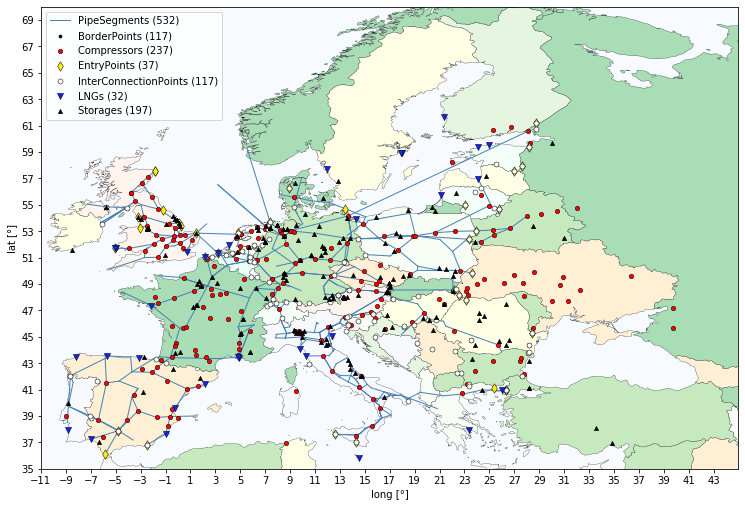

In [11]:
M_Visuell.quickplot(Netz_InterNet, LegendStyle = 'Str(Num)', LegendStr = '', countrycode = 'EU')

# 4 Process flow overview

Hier a brief overview of the process flow is given, so that from different data sources of gas components a single resulting gas network data set can be generated.  

<img src="Dokumentation/JupyterNotebook/Bilder/ProcessFlowOverview.png" width="400"/>



# 5 Creation of combined network data set

## 5.1 Initial settings

The following modules are required:

In [12]:
import Code.M_LoadAdditional as M_LoadAdditional 
import Code.JoinNetz         as JoinNetz

## 5.2 Loading the sources into a dictionary

It is specified, which data sources to load (**sourceList**), and from what locations they are to be loaded (**DataLocationType**).

In [13]:
sourceList        = ['InterNet',  'GIE'] 
DataLocationType  = 'Data_Raw_CSV' 
DataDict             = {}
DataDict['InterNet'] = Netz_InterNet
DataDict['GIE']      = Netz_GIE
#DataDict            = M_LoadAdditional.loadData(DataLocationType = DataLocationType, sourceList = sourceList)

DataDict['InterNet'].all()
DataDict['GIE'].all()

--------------------------------------
Source                         InterNet
total component type count          0
--------------------------------------
BorderPoints                      117
Compressors                       237
ConnectionPoints                    0
Consumers                           0
EntryPoints                        37
InterConnectionPoints             117
LNGs                               32
Nodes                             739
PipeLines                           0
PipePoints                          0
PipeSegments                      532
Processes                           2
Productions                         0
Storages                          197
--------------------------------------
Length of PipeLines    [km]         0
Length of PipeSegments [km]     46336
--------------------------------------
Source                               
total component type count          0
--------------------------------------
BorderPoints                        0
Compr

## 5.3 Combining the data into a single data set
The following tow data Components **LNGs** and **Storages** are being joined. 

In [14]:
CompNames2Join    = ['LNGs', 'Storages']
Netz_Merged       = JoinNetz.join(DataDict, 'Scen_1', CompNames2Join)
Netz_Merged.all()

--------------------------------------
Source                         InterNet
total component type count          0
--------------------------------------
BorderPoints                      117
Compressors                       237
ConnectionPoints                    0
Consumers                           0
EntryPoints                        37
InterConnectionPoints             117
LNGs                               32
Nodes                             739
PipeLines                           0
PipePoints                          0
PipeSegments                      532
Processes                           2
Productions                         0
Storages                          197
--------------------------------------
Length of PipeLines    [km]         0
Length of PipeSegments [km]     46336


and doing some cleaning of the data.

In [15]:
Netz_Merged.cleanUpNodes(skipNodes = True)

Doing some checking of the data:

--------------------------------------
Source                         InterNet
total component type count          0
--------------------------------------
BorderPoints                      117
Compressors                       237
ConnectionPoints                    0
Consumers                           0
EntryPoints                        37
InterConnectionPoints             117
LNGs                               32
Nodes                             739
PipeLines                           0
PipePoints                          0
PipeSegments                      532
Processes                           2
Productions                         0
Storages                          197
--------------------------------------
Length of PipeLines    [km]         0
Length of PipeSegments [km]     46336


(<Figure size 900x612 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2c0afc50>)

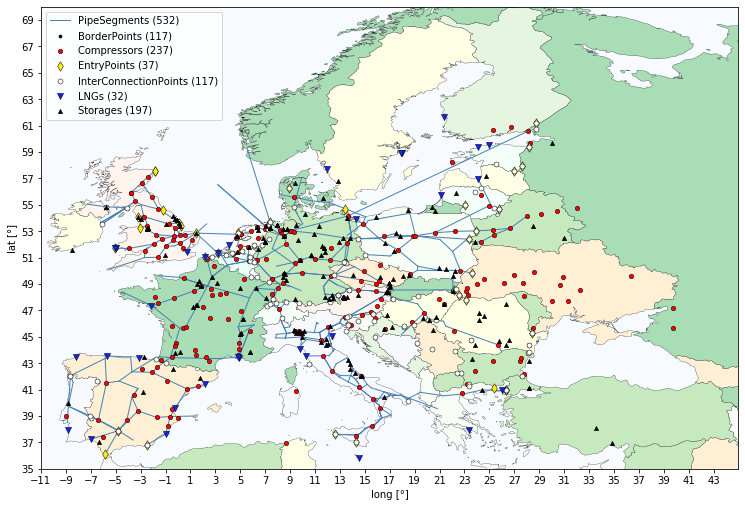

In [16]:
Netz_Merged.all()
M_Visuell.quickplot(Netz_InterNet, LegendStyle = 'Str(Num)', LegendStr = '', countrycode = 'EU', Cursor = True)

Writing the combined data set to a folder:

In [17]:
dir_Data_Raw_Merged         = 'Ausgabe/GeneratedNetz/02_NonOSM/Data/Data_Merged/'
M_CSV.write(dir_Data_Raw_Merged, Netz_Merged)

# 6 Attribute data QA

There are alot of attribute values that are missing.  These need to be filled.  However, before one can do that one needs to know how good the existing data is, so that it can be used during the attribute value genereation process.    

Hence one needs a good understanding of the data, e.g.:
- if they are just total random numbers
- if they are Gauss distributed
- how many values are given
- how many values need to be generated.

For this some functionality has been generated to that helps in visualizing the attribute values.  
First of all, for each attribute a histogram plot will be generated and will be stored.  In addition pair-plots are generated for all attributes from each component.  Here pair plots are plots where one set of attribute values is plotted against another attribute value set.
However, setup files will determine which attribute to plot:

## 6.1 StatsAttribSettings.CSV

This is the setup file, that conains a list of models, that can be applied to the data.  
<img src = "Dokumentation/JupyterNotebook/Bilder/StatsAttribSettings_.jpg" width = "700px">
It contains the following three columns:

- **CompNamer**: Name of the component.
- **AttribName**: Name of the attribute.
- **Load**: Boolean (0 or 1) to load this attribute, so that it can be used as feature in regression.


## 6.2 Generation of histograms

This will be carried out with the following commands:

In [18]:
import Code.M_Stats    as M_Stats

In [19]:
DataStatsOutput    = 'Ausgabe/GeneratedNetz/02_NonOSM/StatsData'
StatsInputDirName  = 'Ausgabe/GeneratedNetz/02_NonOSM/SetupFiles/Method_Testing'
M_Stats.gen_DataHists(Netz_Merged, CompNames = [], AttribNames = [], DataStatsOutput    = DataStatsOutput, 
             StatsInputDirName  = StatsInputDirName)

 
 
Info Data Frame Sizes:
# of entries:   237
# of features:  16
 
 
Number of missing values:
is_H_gas                  1
max_cap_M_m3_per_d      218
max_power_MW            204
max_pressure_bar        219
num_turb                199
turbine_fuel_isGas_1    201
turbine_fuel_isGas_2    202
turbine_fuel_isGas_3    214
turbine_fuel_isGas_4    228
turbine_fuel_isGas_5    234
turbine_power_1_MW      217
turbine_power_2_MW      218
turbine_power_3_MW      224
turbine_power_4_MW      233
turbine_power_5_MW      234
turbine_power_6_MW      236
dtype: int64
 
 
 
Info Data Frame Sizes:
# of entries:   32
# of features:  3
 
 
Number of missing values:
max_cap_store2pipe_M_m3_per_d        3
max_workingGas_M_m3                  1
median_cap_store2pipe_M_m3_per_d    11
dtype: int64
 
 
 
Info Data Frame Sizes:
# of entries:   197
# of features:  9
 
 
Number of missing values:
is_H_gas                         173
is_onShore                         9
max_cap_pipe2store_M_m3_per_d     36
max_cap_s

Below are two example outputs of the plots generated.  The first one is the single attribute histogram, where the top subplot depicts the values, whereas the second subplot depicts a histogram of the data.  The second plot are the pair-plots.

<img src="Dokumentation/JupyterNotebook/Bilder/HistPlots.png" width = "400px">

<img src = "Dokumentation/JupyterNotebook/Bilder/MethodConcpet_OverView.png" width = "400px">

Based on the above plots for each attribute, the user can do the following:

- look for outlayers (wrong data) in the data and correct the data
- assure that enough data is given for any subsequent analysis.


# 7 Testing possible heuristic methods

There are several heuristic methods that could be used to determine missing attriute values, such as:

- One can assume a constant value for each attribute.
- One could estimate mean/median/min/max values from each attribute and use those as fill values.
- One could see, if there are correlations between attribute values (linear/logistic regression).

However, one does not know which of the methods would be best to use.  Hence, one needs to test them all, and then select the one, that retuns the "best" attribute values.  Here it is assumed, that different attributes might need different methods.

For this process one needs to set up a couple of setup files and then run the testing process.


## 7.1 Setup file

There are two setup file, one for the models (linear regression, logistic regression, mean, median, ...), and one setup file for the attributes of the components.  Both files need setting up in responce of the user requests.

### 7.1.1 StatsModelSettings.CSV

This is the setup file, that conains a list of models, that can be applied to the data.  
<img src = "Dokumentation/JupyterNotebook/Bilder/StatsMethodsSettings.jpg" width = "300px">
It contains the following three columns:

- **ModelName**: This is the name of the heuristic method that has been coded and can be selected.
- **Param**: Field for additional parameters that could be supplied to fitting routine.
- **ToBeApplied**: This is a boolean (0 or 1), indicating if this fitting model shall be applied to the data or not.

### 7.1.2 StatsAttribSettings.CSV

This is the setup file, that conains a list of models, that can be applied to the data.  
<img src = "Dokumentation/JupyterNotebook/Bilder/StatsAttribSettings_.jpg" width = "700px">
It contains the following three columns:

- **CompNamer**: Name of the component.
- **AttribName**: Name of the attribute.
- **Load**: Boolean (0 or 1) to load this attribute, so that it can be used as feature in regression.
- **Simulate**: Boolean (0 or 1), indicating that this attribute shall be simulated or not.
- **Convert2Float**: Boolean (0 or 1), to convert attribute values to float.
- **RegressionType**: String, indicating which regression class (**lin** for "linear" and **log** for "logistic") to use.





## 7.2 Execution of parameter generation

With the setup files for the methods and attributes, the user can start the process of testing all selected methods and for all specified attributes:

In [20]:
CompNames2Test      = ['LNGs', 'Compressors', 'Storages', 'PipeSegments']
M_Stats.gen_StatsParam(Netz_Merged, CompNames = CompNames2Test, SavePlots = True, MaxCombDepth = 1, 
                               StatsInputDirName  = 'Ausgabe/GeneratedNetz/02_NonOSM/SetupFiles/Method_Testing',
                               DataStatsOutput    = 'Ausgabe/GeneratedNetz/02_NonOSM/StatsData')



 
Component name:  LNGs
Attribute name:  max_cap_store2pipe_M_m3_per_d
Model: Lasso
Model:  Mean
Model:  Median
Model:  Min
Model:  Max
Attribute name:  max_workingGas_M_m3
Model: Lasso
Model:  Mean
Model:  Median
Model:  Min
Model:  Max
Attribute name:  median_cap_store2pipe_M_m3_per_d
Model: Lasso
Model:  Mean
Model:  Median
Model:  Min
Model:  Max
 
Component name:  Compressors
Attribute name:  is_H_gas
Model: LogisticReg
Attribute name:  max_cap_M_m3_per_d
Model: Lasso
Model:  Mean
Model:  Median
Model:  Min
Model:  Max
Attribute name:  max_power_MW
Model: Lasso
Model:  Mean
Model:  Median
Model:  Min
Model:  Max
Attribute name:  max_pressure_bar
Model: Lasso
Model:  Mean
Model:  Median
Model:  Min
Model:  Max
Attribute name:  num_turb
Model: Lasso
Model:  Mean
Model:  Median
Model:  Min
Model:  Max
Attribute name:  turbine_fuel_isGas_1
Model: LogisticReg
Attribute name:  turbine_fuel_isGas_2
Model: LogisticReg
Attribute name:  turbine_fuel_isGas_3
Model: LogisticReg
Attribute name

C:\Programming\OpenSciGRID_gas\Code\M_Stats.py:1287: RuntimeWarning: overflow encountered in ubyte_scalars
  SS_res.append((data[idx] - pred[idx]) * (data[idx] - pred[idx]))
C:\Programming\OpenSciGRID_gas\Code\M_Stats.py:1287: RuntimeWarning: overflow encountered in ubyte_scalars
  SS_res.append((data[idx] - pred[idx]) * (data[idx] - pred[idx]))
C:\Programming\OpenSciGRID_gas\Code\M_Stats.py:1287: RuntimeWarning: overflow encountered in ubyte_scalars
  SS_res.append((data[idx] - pred[idx]) * (data[idx] - pred[idx]))
C:\Programming\OpenSciGRID_gas\Code\M_Stats.py:1287: RuntimeWarning: overflow encountered in ubyte_scalars
  SS_res.append((data[idx] - pred[idx]) * (data[idx] - pred[idx]))
C:\Programming\OpenSciGRID_gas\Code\M_Stats.py:1287: RuntimeWarning: overflow encountered in ubyte_scalars
  SS_res.append((data[idx] - pred[idx]) * (data[idx] - pred[idx]))
C:\Programming\OpenSciGRID_gas\Code\M_Stats.py:1287: RuntimeWarning: overflow encountered in ubyte_scalars
  SS_res.append((data[i

Attribute name:  store_type_Salt cavern
Model: LogisticReg


C:\Programming\OpenSciGRID_gas\Code\M_Stats.py:1287: RuntimeWarning: overflow encountered in ubyte_scalars
  SS_res.append((data[idx] - pred[idx]) * (data[idx] - pred[idx]))
C:\Programming\OpenSciGRID_gas\Code\M_Stats.py:1287: RuntimeWarning: overflow encountered in ubyte_scalars
  SS_res.append((data[idx] - pred[idx]) * (data[idx] - pred[idx]))


Attribute name:  store_type_nan
Model: LogisticReg
 
Component name:  PipeSegments
Attribute name:  diameter_mm
Model: Lasso
Model:  Mean
Model:  Median
Model:  Min
Model:  Max
Attribute name:  is_H_gas
Model: LogisticReg
Attribute name:  is_bothDirection
Model: LogisticReg
Attribute name:  max_cap_M_m3_per_d
Model: Lasso
Model:  Mean
Model:  Median
Model:  Min
Model:  Max
Attribute name:  max_pressure_bar
Model: Lasso
Model:  Mean
Model:  Median
Model:  Min
Model:  Max


1

# 8 Selection of heuristics for attributes

After methods have been applied to all selected attributes, the user needs to select the best method for each attribute.  This can be carried out through the information generated through the previous processes.  Hence the output from the previous processes need investigating. For this the user needs to open those output files in conjunction with the plots generated in section "Attribute data QA".

So move CSV files from location:

    'Ausgabe/GeneratedNetz/02_NonOSM/StatsData'  (DataStatsOutput from input above)
to 

    'Ausgabe/GeneratedNetz/02_NonOSM/SetupFiles/Value_Generation'
    
In new destination open files. Example file for compressors:

<img src = "Dokumentation/JupyterNotebook/Bilder/StatsOutputCompressors.png" width = "1100px">

Columns are as follow:
- **CompName**: Component name, should be same for all entries. 
- **AttribName**: Attribute name. 
- **NumElements**: number of elements of this component, should be same for all entries.	
- **MethodName**: Name of the method tested, will be one of the ones selected previously by the user.
- **NumFeatures**: Number of features used to for method.	
- **FeatureNames**: List of feature attribute names, that were used by the method.	
- **Plots**: A link (only working under Windows) to the method's results.  
- **NumSamples**: Number of samples used by method.	
- **NumFill**: Number of how many elements attributes would be filled (maximum = NumElements). 
- **BIC**: Indicator for the goodness of fit of the method using the BIC (Bayesian information criterion) value. 
- **MeanAbsError**: Measure of goodness of fit of the method using the mean absolute error (MAE).
- **R_2**: R-squared value of method used. 
- **R_2_adj**: Adjusted R-squared value fo method used.	
- **ReplaceType**: Empty column, to be filled by hand by user.	
- **ModelParam**: Method parameters used by program, generated during previous step, used during future steps.

**Action**

Based on goodness of fit (BIC, MAE, R_2, R_2_adj), graphs (Plots), the user needs to fill column **ReplaceType**.  Options are:

- **fill**: Ony fills attribute values with method estimation, where no (None) value was given/supplied.
- **replace**: Fills attribute values for all elements, overwriting any existing values (this could be used for copyrighted data used). 

The resulting compressor file could look as follow (where some columns have been hidden for visualization only, hence, please do not remove any columns!):

<img src = "Dokumentation/JupyterNotebook/Bilder/StatsOutputCompressors_Input.png" width = "1100px">

In addition, any line that is not beins selected for the data generation process can be removed.
Further, the order of the lines is important, and will be applied top down.  

On needs to do this for all component files.  

# 9 Generation of missing attribute values

The following command needs executing, and will use the above generated setup files.  This will fill all missing attribute values. Hence below, the 

In [21]:
for compName in CompNames2Test:
    SettingsFileName    = ('Ausgabe/GeneratedNetz/02_NonOSM/SetupFiles/Value_Generation/RetSummary_' + compName + '.csv')
    SimSettings         = M_CSV.read_CSV_raw(SettingsFileName)
        
    Netz_Merged         = M_Stats.pop_Attribs(Netz_Merged, CompNames = [compName], SimSettings = SimSettings)
    
Netz_Component = Netz_Merged

Netz_Component.all()

--------------------------------------
Source                         InterNet
total component type count          0
--------------------------------------
BorderPoints                      117
Compressors                       237
ConnectionPoints                    0
Consumers                           0
EntryPoints                        37
InterConnectionPoints             117
LNGs                               32
Nodes                             739
PipeLines                           0
PipePoints                          0
PipeSegments                      532
Processes                           2
Productions                         0
Storages                          197
--------------------------------------
Length of PipeLines    [km]         0
Length of PipeSegments [km]     46336


In addition, some other attributes might need filling, such as "end_year" or "start_year".  This can  be carried out with the following commands:

In [22]:
Netz_Component.make_Attrib([], '',    'end_year',   'const', 2050)
Netz_Component.make_Attrib([], '',    'start_year', 'const', 1983)
Netz_Component.make_Attrib(['Compressors'], '',    'turbine_fuel_isGas_1', 'const', 1, 'fill')
Netz_Component.make_Attrib(['Compressors'], '',    'turbine_fuel_isGas_2', 'const', 1, 'fill')
Netz_Component.make_Attrib(['Compressors'], '',    'turbine_fuel_isGas_3', 'const', 1, 'fill')
Netz_Component.make_Attrib(['Compressors'], '',    'turbine_fuel_isGas_4', 'const', 1, 'fill')
Netz_Component.make_Attrib(['Compressors'], '',    'turbine_fuel_isGas_5', 'const', 1, 'fill')
Netz_Component.make_Attrib(['Compressors'], '',    'turbine_fuel_isGas_6', 'const', 1, 'fill')


Netz_Component.all()

--------------------------------------
Source                         InterNet
total component type count          0
--------------------------------------
BorderPoints                      117
Compressors                       237
ConnectionPoints                    0
Consumers                           0
EntryPoints                        37
InterConnectionPoints             117
LNGs                               32
Nodes                             739
PipeLines                           0
PipePoints                          0
PipeSegments                      532
Processes                          10
Productions                         0
Storages                          197
--------------------------------------
Length of PipeLines    [km]         0
Length of PipeSegments [km]     46336


# 10 Generation of final network

Now we need to transform the component data set into a network data set, with the difference beeing:

- no islands
- no unconnected nodes
- all components connected to a pipeline

Hence, all components that are currently not connected to a pipeline are being moved to the closes pipeline if it is closer than 100 km, otherwise it will be removed from the data set, by using the followin commands:


In [23]:
# Simplifying network
Netz_Component.cleanUpNodes(compNames = [], skipNodes = True)
Netz_Final  = M_Shape.moveComp2Pipe(Netz_Component.copy2(), 'Compressors',  'PipeSegments', maxDistance = 100.0)
Netz_Final  = M_Shape.moveComp2Pipe(Netz_Final.copy2(), 'Storages',         'PipeSegments', maxDistance = 100.0)
Netz_Final  = M_Shape.moveComp2Pipe(Netz_Final.copy2(), 'ConnectionPoints', 'PipeSegments', maxDistance = 100.0)
Netz_Final  = M_Shape.moveComp2Pipe(Netz_Final.copy2(), 'EntryPoints',      'PipeSegments', maxDistance = 100.0)
Netz_Final  = M_Shape.moveComp2Pipe(Netz_Final.copy2(), 'BorderPoints',     'PipeSegments', maxDistance = 100.0)
Netz_Final  = M_Shape.moveComp2Pipe(Netz_Final.copy2(), 'LNGs',             'PipeSegments', maxDistance = 100.0)


# Ceaning up network
Netz_Final.Nodes  = Netz_Final.add_Nodes([], [])
Netz_Final.Nodes  = M_Shape.reduceElement(Netz_Final.Nodes, reduceType = 'LatLong')
        
Netz_Final.remove_unConnectedComponents()
Netz_Final.remove_unUsedNodes()
        
Netz_Final.Nodes  = Netz_Final.add_Nodes([], [])

# Writing final network to CSV
M_CSV.write('Ausgabe/GeneratedNetz/02_NonOSM/Data/Data_Final/', Netz_Final)


As a final step, one can plot the resulting final gas transport network data set with the following command, and should see a gas transport network.


File saved to: Ausgabe/GeneratedNetz/02_NonOSM/Data/Data_Final/Map_Final.jpg


(<Figure size 900x612 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x33a1f7b8>)

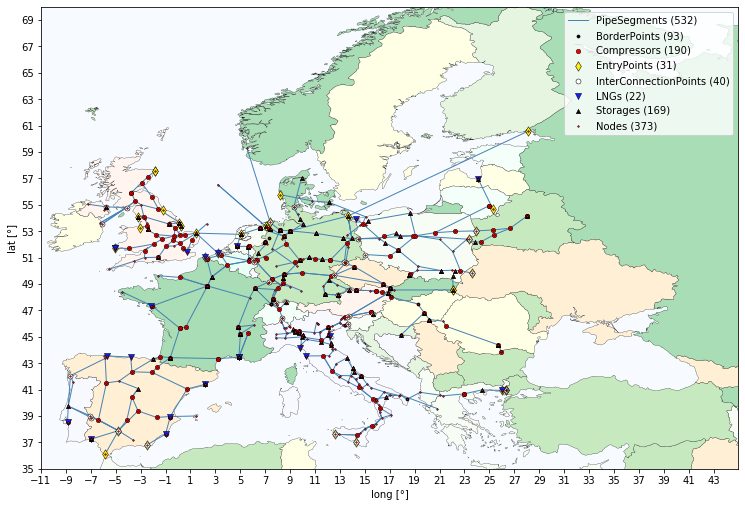

In [24]:
savefile  = 'Ausgabe/GeneratedNetz/02_NonOSM/Data/Data_Final/Map_Final.jpg'

M_Visuell.quickplot(Netz_Final, LegendStr = '', LegendStyle = 'Str(Num)', Save = True, savefile = savefile, PlotList = ["Nodes"])

**Voila !!!!!**  :-)
